In [ ]:
import gymnasium as gym
import highway_env
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Controls:
CONTINUOUS_ACTIONS = False
TESTING = False
VERBOSE = False
###########

if CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("Pendulum-v1", render_mode="rgb_array")
elif CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-v0', config={"action": {"type": "ContinuousAction"}}, render_mode='rgb_array')
elif not CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("CartPole-v1", render_mode="rgb_array")
elif not CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-v0', render_mode='rgb_array')
else:
    print("invalid controls, aborting...")
    quit()

env.reset()
done = False

if VERBOSE:
    if CONTINUOUS_ACTIONS:
        print(env.action_space.shape)
    else:
        print(env.action_space.n)
    print(env.observation_space.shape)

def get_action():
    if CONTINUOUS_ACTIONS and TESTING:
        return [0]
    elif CONTINUOUS_ACTIONS and not TESTING:
        return [0,0]
    elif not CONTINUOUS_ACTIONS and TESTING:
        return 0
    elif not CONTINUOUS_ACTIONS and not TESTING:
        return env.unwrapped.action_type.actions_indexes["IDLE"]
    return None

try:
    while True and not done:
        action = get_action()
        obs, reward, done, truncated, info = env.step(action)
        env.render()
except KeyboardInterrupt: # Ctrl+C on jupyter
    pass

plt.imshow(env.render())
plt.show()
env.close()

In [ ]:
env.close()

Episode:  1 , Reward:  2.8131583425367057
Episode:  2 , Reward:  1.7327113850086178
Episode:  3 , Reward:  17.300301823033482
Episode:  4 , Reward:  18.34261712681898
Episode:  5 , Reward:  11.029445301116898
Episode:  6 , Reward:  3.766322081743954
Episode:  7 , Reward:  13.848295479450657
Episode:  8 , Reward:  1.699378051675284
Episode:  9 , Reward:  17.447604017501654
Episode:  10 , Reward:  3.8117413677917575
Episode:  11 , Reward:  5.283689397743253
Episode:  12 , Reward:  10.91187875312761
Episode:  13 , Reward:  4.032064009786593
Episode:  14 , Reward:  8.915306178193639
Episode:  15 , Reward:  2.5314671950446224
Episode:  16 , Reward:  1.848486085051929
Episode:  17 , Reward:  3.0131583425367054
Episode:  18 , Reward:  5.363382314892505
Episode:  19 , Reward:  22.210166594983512
Episode:  20 , Reward:  7.746842327990695
Episode:  21 , Reward:  2.747906744581381
Episode:  22 , Reward:  15.476995353668336
Episode:  23 , Reward:  4.548479431897239
Episode:  24 , Reward:  5.151329

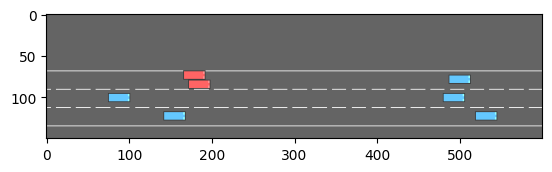

In [2]:
import gymnasium as gym
import highway_env
from matplotlib import pyplot as plt
from algorithms.REINFORCE import Reinforce
%matplotlib inline

# Controls:
CONTINUOUS_ACTIONS = False
TESTING = False
###########

if CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("Pendulum-v1", render_mode="rgb_array")
elif CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-fast-v0', config={"action": {"type": "ContinuousAction"}}, render_mode='rgb_array')
elif not CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("CartPole-v1", render_mode="rgb_array")
elif not CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-fast-v0', render_mode='rgb_array')
else:
    print("invalid controls, aborting...")
    quit()

model = Reinforce(env, episodes=100, flags=[1])
rs = model.learn()

done = truncated = False
obs, info = env.reset()
while not (done or truncated):
    action = model.predict(obs)
    obs, reward, done, truncated, info = env.step(action)
    env.render()

plt.imshow(env.render())
plt.show()
env.close()